# Data analysis and visualisation

In this notebook we show a way to make use of the helper python scripts and the routines to analyse and visualise data from mcdust.

We import routines from the script mcdust.py which is in the `/scripts/` directory

In [1]:
from mcdust import Simulation, Plots

The routines to read and store data from mcdust are stored in the Simulation() class, so let's start by defining a variable

In [2]:
sim = Simulation()

Next, to make use of the read function we need to establish the location of the data and give the same as an input.

In [3]:
path='/your/path/to/data/directory'
sim.read(path)

 Reading paramters file from data files in /scratch/vaikundaraman/mcdust/outputs/data/
mcdust   v1.0
Authors : Dr Joanna Drazkowska, Vignesh Vaikundaraman, Nerea Gurrutuxaga
Please cite Drążkowska, Windmark & Dullemond (2013) A&A 556, A37
Reading data ...


100%|███████████████████████████████████████████| 42/42 [00:04<00:00,  9.42it/s]


Done!


/scratch/vaikundaraman/mcdust/scripts/mcdisk.py:208: RuntimeWarning: divide by zero encountered in true_divide
  self.taugrowth = 1/self.dtg/self.omegaK[:]
/scratch/vaikundaraman/mcdust/scripts/mcdisk.py:209: RuntimeWarning: divide by zero encountered in true_divide
  self.tmix = 1./(1e-3 * self.omegaK[:])
/scratch/vaikundaraman/mcdust/scripts/mcdisk.py:210: RuntimeWarning: invalid value encountered in true_divide
  self.rhog_mid  = self.sigmag/np.sqrt(2*np.pi)/self.Hg


We have read data into the object `sim`. The object `sim` contains the data of the swarms of the simulation in `sim.swarms` and the parameters of the simulation in `sim.pars`.

The object `sim.pars` contains the paramters of the simulation that was fed into `setup.par` to run the simulation. And along with those parameters, it also contains the number of swarms in the simulation `nswarms` and the number of outputs/snapshots of the simulation `ntime`.

The attributes of `sim.pars` can be seen below

In [4]:
sim.pars.__dict__

{'alpha_t': 0.001,
 'tgas': 280.0,
 'sigmagas': 800.0,
 'minr': 1.0,
 'maxr': 100.0,
 'a0': 1e-04,
 'vfrag': 1000.0,
 'rho_s': 1.2,
 'dtg': 0.01,
 'erosion_m_ratio': 10.0,
 't_end': 315581500000.0,
 'nr': 32,
 'nz': 16,
 'n_cell': 256,
 'nswarms': 131072,
 'ntime': 42,
 'eta': 0.05,
 'datadir': '/scratch/vaikundaraman/mcdust/outputs/data//',
 'alpha': 0.001}

The object`sim.swarms` contains the id number of the swarms, radial location[AU], vertical height[AU], Stokes Number, grain size[cm], internal density [g/cm^3], radial velocity [cm/s], vertical velocity [cm/s].

The properties are stored in 2 dimensional arrays with indices [ntime,nswarms]. Along with these properties it also contains the mass of a whole swarm `mswarm`(g) and the times (yr) of the snapshots of the simulation.

In [5]:
dir(sim.swarms)

['St',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'calculate_properties',
 'describe',
 'grain_size',
 'idnr',
 'indens',
 'mass',
 'mswarm',
 'rcents',
 'rdis',
 'read_hdf5',
 'rwalls',
 'sigmad',
 'snapt',
 'velr',
 'velz',
 'zdis']

An overall basic statistics for the given simulation can be seen at a glance with `sim.swarms.describe()`

In [6]:
sim.swarms.describe()

           mass [g]     Stokes Nr  grain_size [cm]
count  1.310720e+05  1.310720e+05    131072.000000
mean   8.931285e+01  4.464831e-03         0.448102
std    5.139990e+02  1.256053e-02         1.510780
min    5.026548e-12  2.409769e-07         0.000100
25%    4.523893e-11  4.614724e-05         0.000208
50%    6.936637e-10  9.578160e-05         0.000517
75%    5.245570e-06  1.044858e-03         0.010143
max    1.056346e+04  1.235100e-01        12.808906


There is also a routine `sim.swarms.calculate_properties()` to calculate the dust surface density `sigma_d` for the simulation.

# Data Visualisation

The class `Plots` contains some routines to visualise the data. Currently there are 4 routines, `Plots.scatter_all()`, `Plots.rz_scatter()`, `Plots.sigmad()` and `Plots.mass_dens_radial()`

## Scatter Plots


Scatter plots are helpful to visualise the different properties of the swarms.The `Plots.scatter_all()` visualises the default properties that are tracked in `mcdust`, namely, the Stokes Number, mass, grain size and internal density.

If you want to specifically look at one property, the `Plots.rz_scatter()` is helpful.

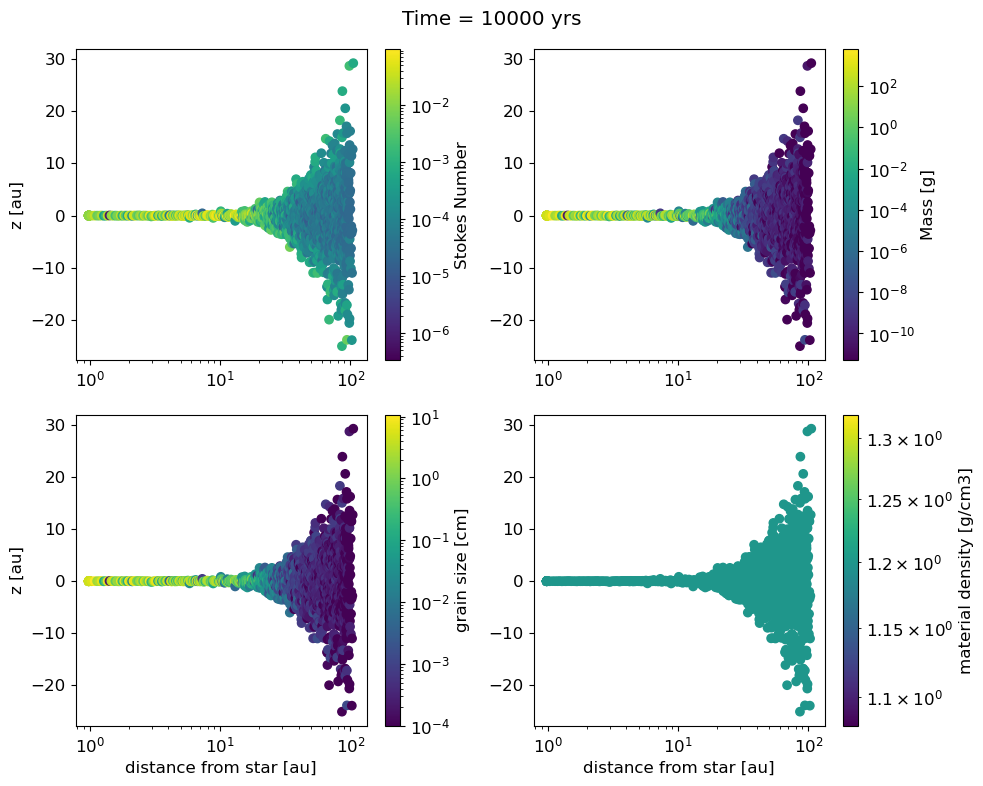

In [7]:
Plots.scatter_all(sim.swarms, step=100)
#the argument step denotes the increment to print every nth variable. The default is 1.

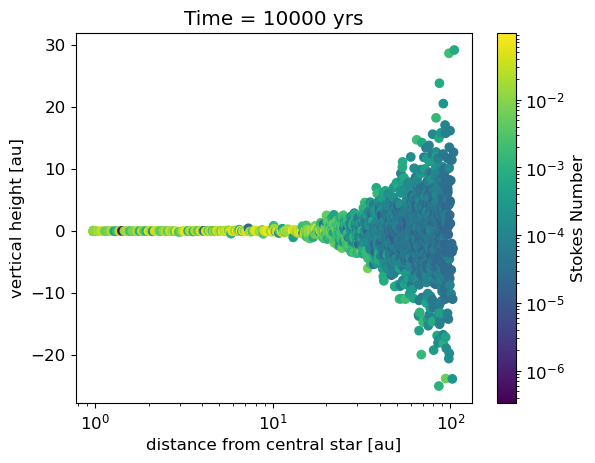

In [8]:
Plots.rz_scatter(sim.swarms,time=-1,step=100,scatter=sim.swarms.St,cbarlabel='Stokes Number')

# Dust surface density $\sigma_d(\mathrm{m,a})$

One can also quickly visualise the dust surface density with `Plots.mass_dens_radial()`

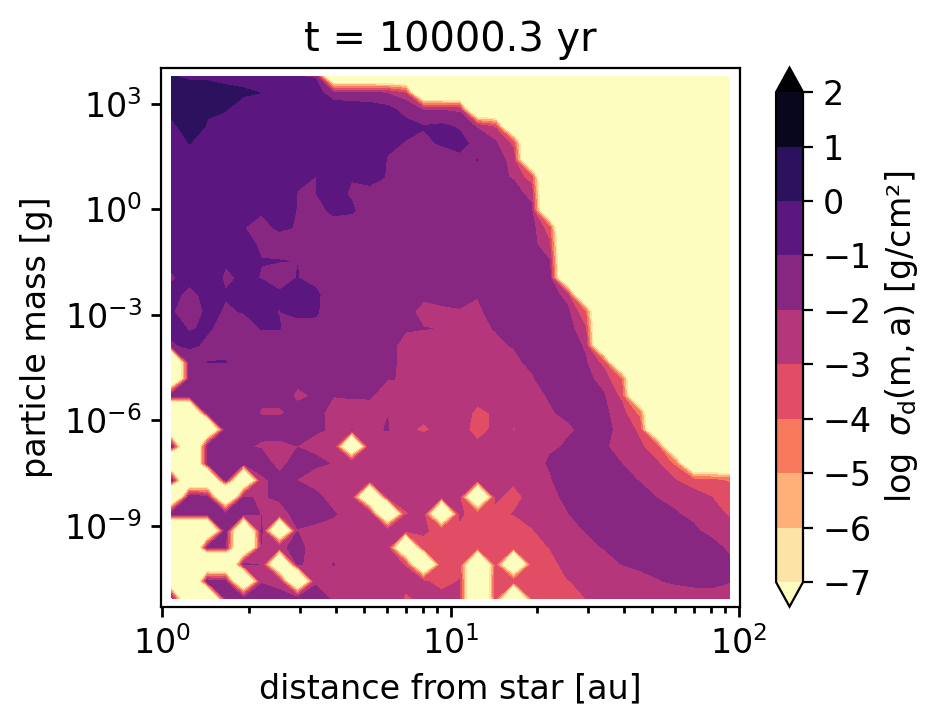

In [9]:
Plots.mass_dens_radial(sim.swarms,sim.pars)